In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

In [3]:
memory_usage = data.memory_usage(deep=True) / 1024 ** 2
memory_usage.head(7)

Index    0.000122
id       1.907349
f0       1.907349
f1       1.907349
f2       1.907349
f3       1.907349
f4       1.907349
dtype: float64

In [4]:
memory_usage.sum()

194.5496826171875

In [5]:
def reduce_memory_usage(df, verbose=True):
    numerics = ["int8", "int16", "int32", "int64", "float16", "float32", "float64"]
    start_mem = df.memory_usage().sum() / 1024 ** 2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == "int":
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if (
                    c_min > np.finfo(np.float16).min
                    and c_max < np.finfo(np.float16).max
                ):
                    df[col] = df[col].astype(np.float16)
                elif (
                    c_min > np.finfo(np.float32).min
                    and c_max < np.finfo(np.float32).max
                ):
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024 ** 2
    if verbose:
        print(
            "Mem. usage decreased to {:.2f} Mb ({:.1f}% reduction)".format(
                end_mem, 100 * (start_mem - end_mem) / start_mem
            )
        )
    return df

reduced_df = reduce_memory_usage(data, verbose=True)

Mem. usage decreased to 50.78 Mb (73.9% reduction)


In [13]:
reduced_df.describe()

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f91,f92,f93,f94,f95,f96,f97,f98,f99,loss
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.0000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,124999.500000,NaN,51.378476,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,6.813920
std,72168.927986,0.000000,42.396636,0.000000,0.000000,NaN,0.000000,NaN,0.000000,NaN,...,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.940179
min,0.000000,-0.069275,-17.000000,-7.894531,-1.475586,-7588.000,-3.291016,-40.968750,-4.144531,-502.750000,...,-12696.0000,-4.058594,0.057800,-1.999023,-24.687500,-1.131836,0.005249,-0.646973,-0.842285,0.000000
25%,62499.750000,0.251221,18.000000,-0.611328,-0.719238,163.875,4.109375,27.890625,-0.026245,-17.390625,...,73.1875,11.523438,1.471680,-0.408936,-4.003906,1.906250,0.359619,1.215820,3.732422,1.000000
50%,124999.500000,0.515137,41.000000,0.253906,0.004099,943.000,7.472656,91.000000,0.619629,8.714844,...,1060.0000,20.000000,1.661133,0.215698,0.759766,2.339844,0.531250,1.451172,7.183594,4.000000
75%,187499.250000,0.777344,75.000000,0.759277,0.765625,4116.000,11.031250,240.875000,0.934082,55.406250,...,5572.0000,32.281250,2.320312,0.502930,6.203125,2.910156,0.709961,1.901367,11.000000,10.000000
max,249999.000000,1.072266,273.000000,9.765625,1.680664,37856.000,35.062500,947.000000,4.011719,466.000000,...,54336.0000,79.937500,5.402344,1.944336,42.875000,5.574219,1.105469,4.492188,34.031250,42.000000


Let's sample the data to ease the computation. We'll take only 20% of the data and start working with that

In [16]:
sample_df = reduced_df.sample(int(len(reduced_df) * 0.2))
sample_df.shape

(50000, 102)

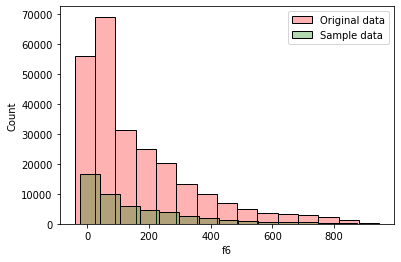

In [20]:
# Let's confirm if the sampling is retaining the feature distributions

fig, ax = plt.subplots(figsize=(6, 4))

sns.histplot(
    data=reduced_df, x="f6", label="Original data", color="red", alpha=0.3, bins=15
)
sns.histplot(
    data=sample_df, x="f6", label="Sample data", color="green", alpha=0.3, bins=15
)

plt.legend()
plt.show();

<ipython-input-22-d7b611683e69>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


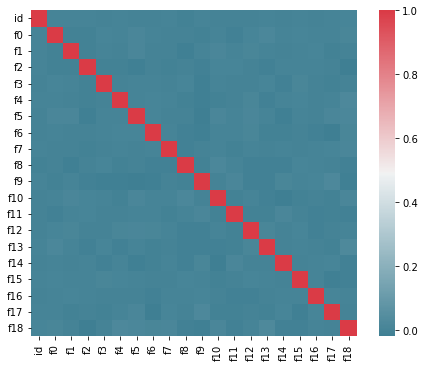

In [22]:
f, ax = plt.subplots(figsize=(8, 6))
corr = reduced_df.iloc[:,:20].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

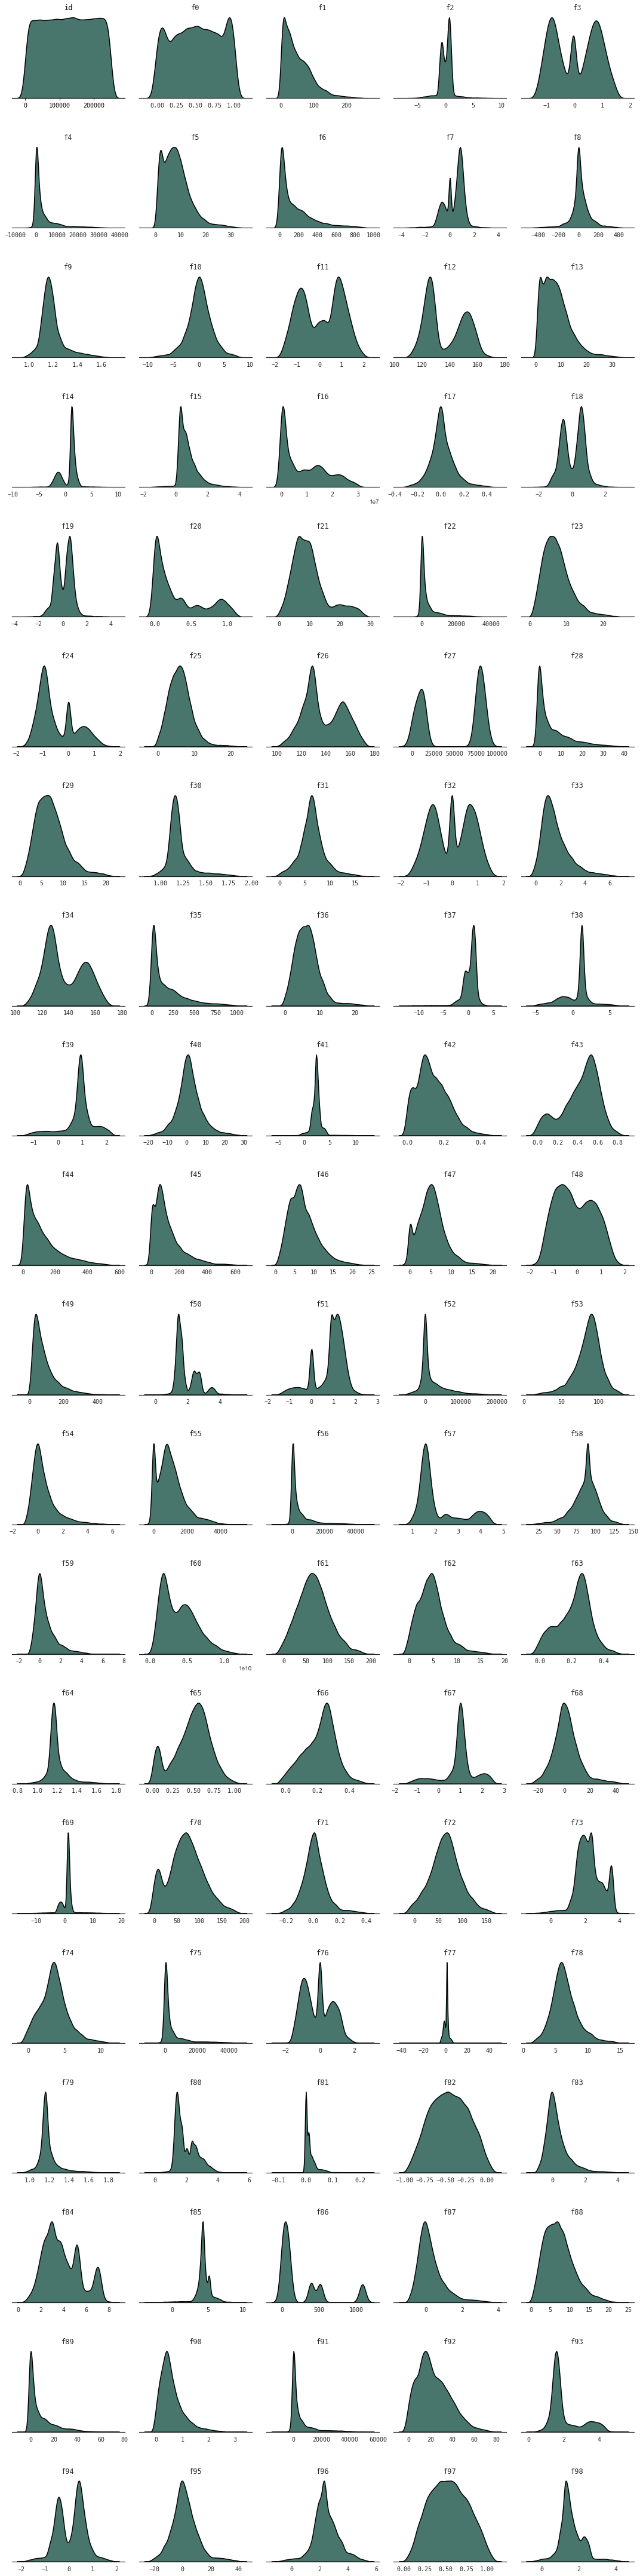

In [23]:
fig = plt.figure(figsize = (15, 50))
for i in range(len(sample_df.columns.tolist()[:100])):
    plt.subplot(20,5,i+1)
    sns.set_style("white")
    plt.title(sample_df.columns.tolist()[:100][i], size = 12, fontname = 'monospace')
    a = sns.kdeplot(sample_df[sample_df.columns.tolist()[:100][i]], color = '#1a5d57', shade = True, alpha = 0.9, linewidth = 1.5, edgecolor = 'black')
    plt.ylabel('')
    plt.xlabel('')
    plt.xticks(fontname = 'monospace')
    plt.yticks([])
    for j in ['right', 'left', 'top']:
        a.spines[j].set_visible(False)
        a.spines['bottom'].set_linewidth(1.2)
        
fig.tight_layout(h_pad = 3)

plt.show()